<a href="https://colab.research.google.com/github/bharathulaprasad/HiddenMarkovModelDemo/blob/main/HiddenMarkovModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Sampling from HMM
-----------------
This script shows how to sample points from a Hidden Markov Model (HMM):
we use a 3-state model with specified mean and covariance.
The plot show the sequence of observations generated with the transitions
between them. We can see that, as specified by our transition matrix,
there are no transition between component 1 and 2.



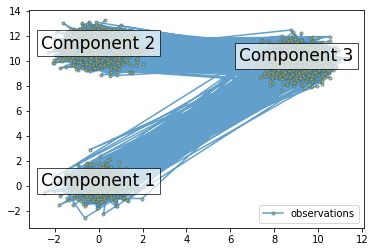

In [2]:
"""
Sampling from HMM
-----------------
This script shows how to sample points from a Hidden Markov Model (HMM):
we use a 3-state model with specified mean and covariance.
The plot show the sequence of observations generated with the transitions
between them. We can see that, as specified by our transition matrix,
there are no transition between component 1 and 2.
"""
!pip install hmmlearn
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

##############################################################
# Prepare parameters for a 3-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1])
# The transition matrix, note that there are no transitions possible
# between component 1 and 2
transmat = np.array([[0.7, 0.0,  0.3],
                     [0.0, 0.8,  0.2],
                     [0.1, 0.2,  0.7]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=3, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars
###############################################################

# Generate samples
X, Z = model.sample(5000)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()